# References
[1] Chicco, D., Warrens, M. J., & Jurman, G. (2021). The coefficient of determination R-squared is more informative than SMAPE, MAE, MAPE, MSE and RMSE in regression analysis evaluation. PeerJ Computer Science, 7, e623.

In this notebook we aim to replicate the table in the "UC3 use case" example from [1]. Additionally, we generate a plot to illustrate the interpretation of the $R^2$ metric in our report.

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ts = np.asarray([[i, i] for i in range(1, 21)])

In [5]:
rng = np.random.default_rng()
noise = rng.normal(size=(20,))
real = np.asarray([[i, i + n] for i, n in zip(range(1, 21), noise)])

In [37]:
correct_model  = ts.copy()

In [38]:
wrong_model = np.polynomial.polynomial.Polynomial.fit(real[0:10, 0], real[0:10, 1], 10)

/usr/local/lib/python3.7/dist-packages/numpy/polynomial/polynomial.py:1350: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


In [63]:
ybar = np.mean(real[:, 1])
mst = np.mean((real[:, 1] - ybar) ** 2)
constant_model = np.repeat(mst, real.shape[0])

In [61]:
def r_squared(ytrue, ypred):
  ybar = np.mean(ytrue)
  mst = np.mean((ytrue - ybar) ** 2)
  mse = np.mean((ypred - ytrue) ** 2)
  return 1.0 - mse / mst

In [101]:
def mse(ytrue, ypred):
  return np.mean((ypred - ytrue) ** 2)

In [113]:
def mst(ytrue):
  ybar = np.mean(ytrue)
  return np.mean((ytrue - ybar) ** 2)

In [59]:
gt = real[:, 1]
correct_preds = ts[:, 1]
wrong_preds = wrong_model(real[:, 0])

In [65]:
# Attempt to replicate table 2, page 12.
for i in range(2, ts.shape[0] + 1):
  r1 = r2_score(gt[0:i], correct_preds[0:i])
  r2 = r2_score(gt[0:i], wrong_preds[0:i])
  r3 = r2_score(gt[0:i], constant_model[0:i])
  if i > 10:
    print(i, f"{r1:.6f}", f"{r2:.6E}", f"{r3:.6E}")
  else:
    print(i, f"{r1:.6f}", f"{r2:.6f}", f"{r3:.6f}")

2 0.447837 1.000000 -729.913514
3 0.498301 1.000000 -949.891910
4 0.568251 1.000000 -915.366436
5 0.774266 1.000000 -301.755974
6 0.844247 1.000000 -218.481843
7 0.867315 1.000000 -142.598298
8 0.853528 1.000000 -91.615949
9 0.878126 1.000000 -82.755425
10 0.899598 1.000000 -68.857003
11 0.912389 -9.817003E+01 -5.507524E+01
12 0.920741 -8.070130E+03 -4.435916E+01
13 0.930712 -1.897260E+05 -3.739605E+01
14 0.939911 -2.336832E+06 -3.211259E+01
15 0.941416 -2.035590E+07 -3.016380E+01
16 0.932044 -1.329187E+08 -2.888020E+01
17 0.939331 -6.461589E+08 -2.572715E+01
18 0.947462 -2.396045E+09 -2.078834E+01
19 0.949228 -7.537029E+09 -1.651845E+01
20 0.954617 -2.319723E+10 -1.480752E+01


In [104]:
r1s = []
r2s = []
r3s = []
for i in range(2, ts.shape[0] + 1):
  r1s.append(r2_score(gt[0:i], correct_preds[0:i]))
  r2s.append(r2_score(gt[0:i], wrong_preds[0:i]))
  r3s.append(r2_score(gt[0:i], constant_model[0:i]))

In [115]:
mse1 = []
mse2 = []
mse3 = []
msts = []
for i in range(2, ts.shape[0] + 1):
  mse1.append(mse(gt[0:i], correct_preds[0:i]))
  mse2.append(mse(gt[0:i], wrong_preds[0:i]))
  mse3.append(mse(gt[0:i], constant_model[0:i]))
  msts.append(mst(gt[0:i]))

In [132]:
def make_plot(n = 20):
  n += 1
  fig, axs = plt.subplots(1, 3, figsize=(12, 4))
  axs[0].plot(ts[0:n, 0], correct_preds[0:n], label="Correct model", color="purple")
  axs[0].plot(ts[0:n, 0], wrong_preds[0:n], label="Wrong model", color="red")
  axs[0].plot(ts[0:n, 0], constant_model[0:n], label="Constant model", color="gold")
  axs[0].plot(ts[0:n, 0], gt[0:n], label="Ground truth", linestyle="dashed")
  axs[0].set_xlabel("Feature ($x$)")
  axs[0].set_ylabel("Prediction / Ground truth ($y$)")
  axs[0].legend()
  axs[0].set_yscale("log")
  axs[0].set_title("Predictions")

  axs[1].set_xlabel("Number of samples (N)")
  axs[1].set_ylabel("R-squared metric")
  axs[1].plot(range(2, n), mse1[0:n-2], label="Correct model", color="purple")
  axs[1].plot(range(2, n), mse2[0:n-2], label="Wrong model", color="red")
  axs[1].plot(range(2, n), mse3[0:n-2], label="Constant model", color="gold")
  axs[1].plot(range(2, n), msts[0:n-2], label="MST", linestyle="dashed", color="green")
  axs[1].set_yscale("log")
  axs[1].set_title("Mean Squared Error")
  axs[1].legend()

  axs[2].set_xlabel("Number of samples (N)")
  axs[2].set_ylabel("MSE metric")
  axs[2].plot(range(2, n), r1s[0:n-2], label="Correct model", color="purple")
  axs[2].plot(range(2, n), r2s[0:n-2], label="Wrong model", color="red")
  axs[2].plot(range(2, n), r3s[0:n-2], label="Constant model", color="gold")
  axs[2].set_yscale("symlog")
  axs[2].set_title("R-squared")
  axs[2].legend()
  fig.tight_layout()

  return fig

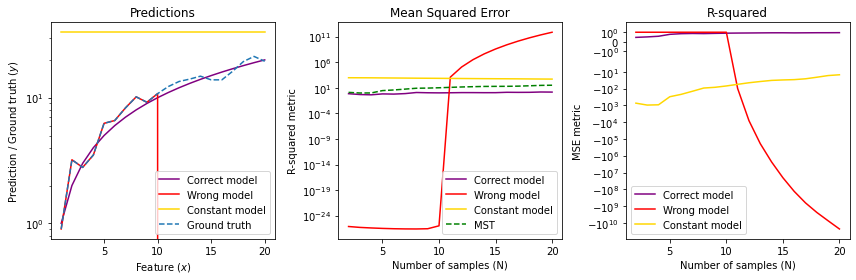

In [141]:
fig = make_plot(20)

In [142]:
fig.savefig("r_squared_example_20.pdf", bbox_inches="tight")

In [143]:
from google.colab import files
files.download("r_squared_example_20.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>